In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
df = pd.read_csv('data_youtube.csv', header = 0)
df.head(3)

,video_channelId,video_channelTitle,video_channelSubscriber,video_id,video_title,video_publishedAt,video_description,video_thumbnails,video_tags,video_categoryId,video_viewCount,video_likeCount,video_commentCount,video_duration_teaser,video_id_mv_official,video_title_mv_official,video_publishedAt_mv_official,video_duration_mv_official,video_viewCount_mv_official,total_hour_mv_published
0,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,QKgGAvlnjMk,WINNER - ‘I LOVE U’ M/V TEASER,2022-06-29 15:00:14+00:00,#WINNER #위너 #4thMINIALBUM #HOLIDAY #TITLE #ILO...,https://i.ytimg.com/vi/QKgGAvlnjMk/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,367167.0,50097.0,2851.0,PT33S,waMAVn2hHBM,WINNER - ‘I LOVE U’ M/V,2022-07-05 09:00:12+00:00,PT3M11S,20183157.0,183114.0
1,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,Z4Byo3MYksk,강승윤 (KANG SEUNG YOON) - 'BORN TO LOVE YOU’ M/V...,2022-03-10 15:00:30+00:00,#강승윤 #KANGSEUNGYOON #4thDIGITALSINGLE #TITLE #...,https://i.ytimg.com/vi/Z4Byo3MYksk/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,308602.0,59197.0,1962.0,PT48S,9mrlCwoOQtQ,강승윤 (KANG SEUNG YOON) - 'BORN TO LOVE YOU' M/V,2022-03-14 09:00:31+00:00,PT3M1S,11893873.0,342954.0
2,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,o_gRFsCEor8,MINO - '탕!♡ (TANG!♡)' M/V TEASER,2021-12-02 15:00:25+00:00,#MINO #송민호 #WINNER #위너 #3rdFULLALBUM #TO_INFIN...,https://i.ytimg.com/vi/o_gRFsCEor8/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,475458.0,40450.0,1477.0,PT22S,VAEEblk-qDU,MINO - '탕!♡ (TANG!♡)' M/V,2021-12-07 09:00:13+00:00,PT3M16S,15466201.0,484074.0


#### Subcriber of each channel

In [3]:
df_channel = pd.DataFrame(df['video_channelTitle'].unique(), columns = ['channel'])
df_channel['subcribers']=0
for x in df_channel['channel']:
    df_channel.loc[df_channel['channel']==x, 'subcribers'] = df.loc[df['video_channelTitle']==x, 'video_channelSubscriber'].max()
df_channel

,channel,subcribers
0,WINNER,4000000
1,SMTOWN,31000000
2,TREASURE (트레저),6510000
3,THEBLACKLABEL,2670000
4,BIGBANG,14900000
5,BLACKPINK,82700000
6,HYBE LABELS,68700000
7,SECHSKIES,545000
8,iKON,8750000
9,JYP Entertainment,25900000


C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_18636/2044901250.py:6: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  plt.tight_layout()
C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_18636/2044901250.py:6: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  plt.tight_layout()
C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_18636/2044901250.py:6: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  plt.tight_layout()
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Progra

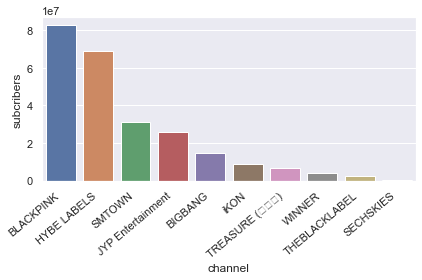

In [4]:
# plot bar chart
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="channel", y="subcribers", data=df_channel.sort_values(by='subcribers', ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#### Time publish teaser and time publish MV

In [5]:
#2018-07-19 01:00:01+00:00
df_time = pd.DataFrame()
df_time['trailer_time'] = pd.to_datetime(df['video_publishedAt']).dt.hour
df_time['mv_time'] = pd.to_datetime(df['video_publishedAt_mv_official']).dt.hour
df_time

,trailer_time,mv_time
0,15,9
1,15,9
2,15,9
3,15,9
4,15,9
...,...,...
839,15,9
840,15,2
841,15,9
842,15,15


C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_18636/2268932548.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_time[x], bins=24, kde=False, rug=False, label=x)


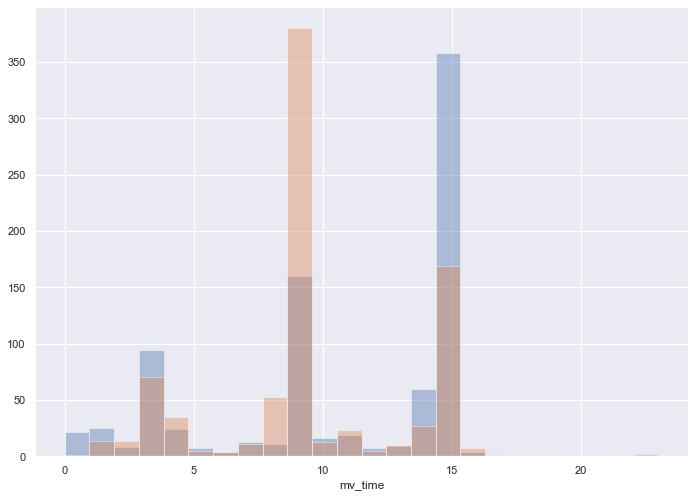

In [6]:
#plot histogram of video_publishedAt and video_publishedAt_mv_official

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
for x in df_time.columns:
    ax = sns.distplot(df_time[x], bins=24, kde=False, rug=False, label=x)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### Total view, like and comment of top 5 video has highest view

In [7]:
df_view = df[['video_title','video_viewCount','video_likeCount','video_commentCount']]
df_view = df_view.sort_values(by='video_viewCount', ascending=False).head(5)
df_view

,video_title,video_viewCount,video_likeCount,video_commentCount
676,BTS (방탄소년단) 'Dynamite' Official Teaser,74558628.0,6455162.0,968304.0
634,BTS (방탄소년단) 'Butter' Official Teaser,64560204.0,5780835.0,1120787.0
556,BLACKPINK - 'Kill This Love' M/V Teaser,60828635.0,2596752.0,119072.0
706,BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) (feat....,44392643.0,3762280.0,273744.0
710,BTS (방탄소년단) 'IDOL' Official Teaser,38586041.0,3490856.0,331495.0


c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\co

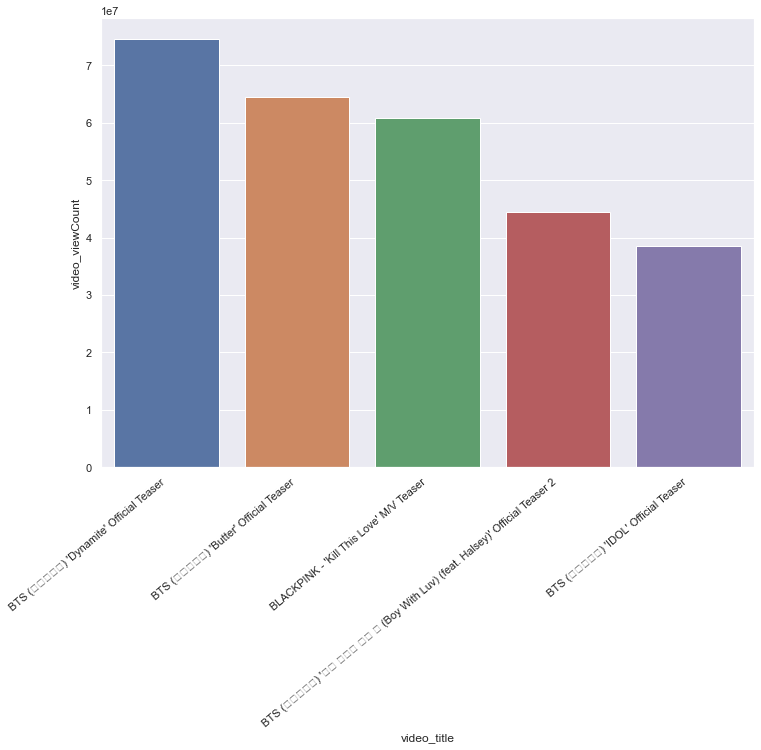

In [8]:
#plot bar chart of top 5 video with highest view count
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.barplot(x="video_title", y="video_viewCount", data=df_view)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### Distribution of video_viewCount,video_likeCount, video_commentCount using box plot

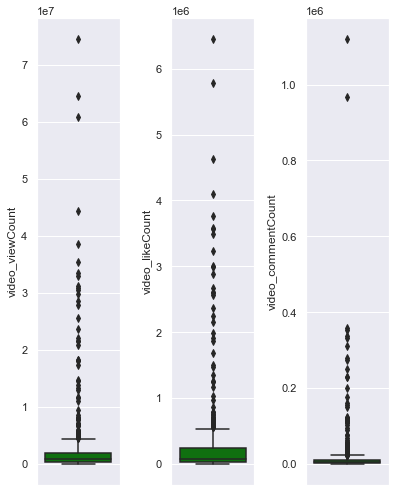

In [9]:
features = ['video_viewCount','video_likeCount','video_commentCount']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[features[i]],color='green',orient='v')
    plt.tight_layout();